<a href="https://colab.research.google.com/github/THEABHASHARMA/Ecommerce-CRM-Analysis/blob/main/EcommerceCapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ecommerce Capstone Project

In [8]:
pip install squarify

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime as dt
import squarify
warnings.simplefilter('ignore')

In [10]:
#Load dataset
df = pd.read_csv("Ecom_CRM_analysis.csv", encoding='unicode_escape')

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
df.shape

(541909, 8)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [14]:
#changing the datatype of InvoiceDate column
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

In [15]:
#Basic statistical summary of the numerical features
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [16]:
#What are the columns present in the dataset?
column=df.columns
column

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [16]:
#How many unique entries present in each column ?
df.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


Missing value

In [17]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [18]:
#Check the percentage of missing values in CustomerID
missing_percentage = df['CustomerID'].isnull().mean() * 100
print(f"Percentage of missing CustomerID: {missing_percentage:.2f}%")

Percentage of missing CustomerID: 24.93%


In [19]:
# Initialize a counter for unknown customers
unknown_customer_counter = 1

# Function to fill missing customer IDs based on InvoiceNo and InvoiceDate
def fill_missing_customer_id(df):
    global unknown_customer_counter

    # Iterate over each group of rows with missing CustomerID
    for name, group in df[df['CustomerID'].isna()].groupby(['InvoiceNo', 'InvoiceDate']):
        # Generate a unique placeholder customer ID
        placeholder_customer_id = f'Unknowncustomer{unknown_customer_counter}'

        # Update the CustomerID for all rows in this group
        df.loc[group.index, 'CustomerID'] = placeholder_customer_id

        # Increment the counter for the next unknown customer
        unknown_customer_counter += 1

    return df

# Apply the function to handle missing customer IDs
df = fill_missing_customer_id(df)

In [20]:
missing_after_imputation = df['CustomerID'].isnull().mean() * 100
print(f"Percentage of missing CustomerID after imputation: {missing_after_imputation:.2f}%")

Percentage of missing CustomerID after imputation: 0.00%


In [21]:
# Function to fill missing descriptions
def fill_missing_description(row, df):
    if pd.isna(row['Description']):  # If description is missing
        # Check if there's a matching description for the same StockCode
        description = df[df['StockCode'] == row['StockCode']]['Description'].dropna().unique()
        if len(description) > 0:  # If found, fill the missing description
            return description[0]
        else:  # Otherwise, set it as 'Unknown Description'
            return 'Unknown Description'
    else:
        return row['Description']

# Apply the function to fill missing descriptions
df['Description'] = df.apply(lambda row: fill_missing_description(row, df), axis=1)

In [22]:
missing_after_imputation = df['Description'].isnull().mean() * 100
print(f"Percentage of missing Description after imputation: {missing_after_imputation:.2f}%")

Percentage of missing Description after imputation: 0.00%


Total quantities of products

In [23]:
df['Description'].value_counts().head(10)

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2369
REGENCY CAKESTAND 3 TIER,2200
JUMBO BAG RED RETROSPOT,2159
PARTY BUNTING,1727
LUNCH BAG RED RETROSPOT,1638
ASSORTED COLOUR BIRD ORNAMENT,1501
SET OF 3 CAKE TINS PANTRY DESIGN,1477
PACK OF 72 RETROSPOT CAKE CASES,1385
LUNCH BAG BLACK SKULL.,1350


Sorting the most ordered products from most to least

In [24]:
df.groupby('Description').agg({'Quantity':'sum'}).sort_values('Quantity', ascending=False)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039
...,...
Damaged,-7540
Printing smudges/thrown away,-9058
check,-12030


'C' in invoices indicates canceled transactions. Let’s remove the canceled transactions from the dataset.

In [25]:
df = df[~df['InvoiceNo'].apply(str).str.contains('C', na=False)]

In [26]:
#Let’s create a variable called ‘TotalPrice’ that represents the total earnings per invoice.
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [23]:
# Descriptive statistics for important columns (e.g., 'Quantity', 'UnitPrice', 'TotalPrice')
print(df[['Quantity', 'UnitPrice', 'TotalPrice']].describe())

            Quantity      UnitPrice     TotalPrice
count  532621.000000  532621.000000  532621.000000
mean       10.239972       3.847621      19.985244
std       159.593551      41.758023     270.574241
min     -9600.000000  -11062.060000  -11062.060000
25%         1.000000       1.250000       3.750000
50%         3.000000       2.080000       9.900000
75%        10.000000       4.130000      17.700000
max     80995.000000   13541.330000  168469.600000


In [24]:
# Check for duplicate entries
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 5231


In [25]:
#Remove Duplicates:
df = df.drop_duplicates()

Detect outliers based on IQR

In [26]:

num_cols = df.dtypes !='object'
num_cols = list(num_cols[num_cols].index)
num_cols

['Quantity', 'InvoiceDate', 'UnitPrice', 'TotalPrice']

In [27]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("lower_bound", lower_bound)
print("upper_bound", upper_bound)

# Identifying outliers
outliers_df = df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]

# Count the number of outliers
outlier_count = outliers_df.shape[0]
print("Count the number of outliers", outlier_count)

print(outlier_count/len(df)*100)

lower_bound -14.0
upper_bound 26.0
Count the number of outliers 28228
5.352395760253323


In [28]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("lower_bound", lower_bound)
print("upper_bound", upper_bound)
# Identifying outliers
outliers_df = df[(df['UnitPrice'] < lower_bound) | (df['Quantity'] > upper_bound)]

# Count the number of outliers
outlier_count = outliers_df.shape[0]
print("Count the number of outliers", outlier_count)

print(outlier_count/len(df)*100)

lower_bound -3.0700000000000003
upper_bound 8.45
Count the number of outliers 156581
29.689793132217147


In [29]:
# Extract month and year from InvoiceDate
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12


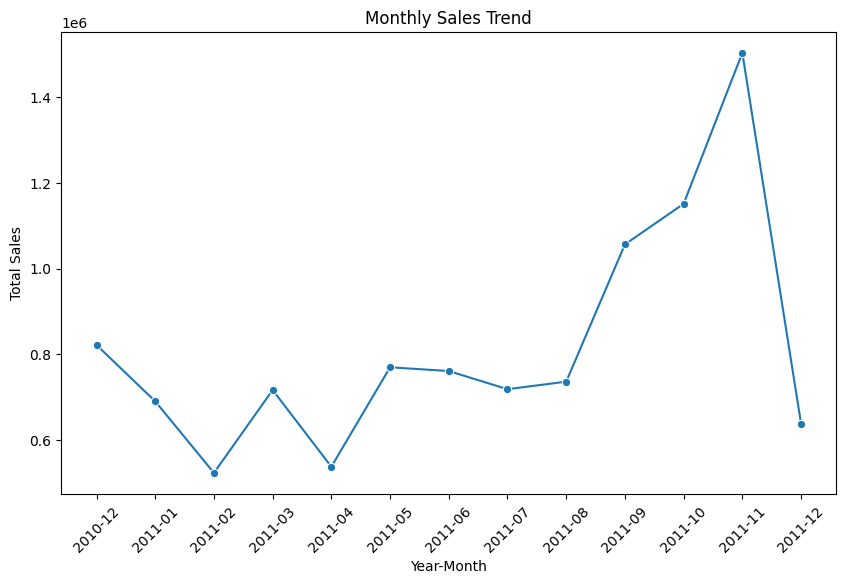

In [30]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a YearMonth column for grouping
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Calculate monthly sales
monthly_sales = df.groupby('YearMonth')['TotalPrice'].sum().reset_index()

# Convert the YearMonth period to string for plotting
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

# Plot the Monthly Sales Trend
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='TotalPrice', marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.show()

#Insights:

Seasonality/Spikes: There is a sharp increase in sales between September and November of 2011, likely indicating a holiday season or a promotional campaign that drove up purchases. December saw a sharp decline, suggesting the peak may have been driven by a time-bound event.

Fluctuations in Early 2011: The first half of 2011 shows fluctuating sales with relatively low peaks and valleys, indicating inconsistent performance during these months. This might reflect off-season periods or smaller-scale promotions.

Growth Trend: From June 2011 onwards, there seems to be a steady increase until the peak in November 2011. This indicates a strong upward momentum, possibly due to strategic marketing, product releases, or increasing customer interest.

Post-Peak Decline: The sudden drop after November suggests that sales might have been driven primarily by seasonal factors, with a fallback to regular levels thereafter.

Actionable Suggestions:
Seasonal Promotions: If the sharp rise in November is tied to holidays or events like Black Friday, you might want to analyze customer behavior in these months to optimize future promotions.

Growth Opportunities: Investigate what changes (marketing campaigns, new product launches, etc.) occurred around mid-2011 to identify successful strategies that contributed to steady growth.

Addressing Fluctuations: Explore reasons for the fluctuating sales early in the year, such as external economic factors or gaps in customer engagement, and consider strategies like loyalty programs or better targeting to reduce variability.

Customer Segmentation Insights

  CustomerID  TotalPrice
0    12346.0    77183.60
1    12347.0     4310.00
2    12348.0     1797.24
3    12349.0     1757.55
4    12350.0      334.40


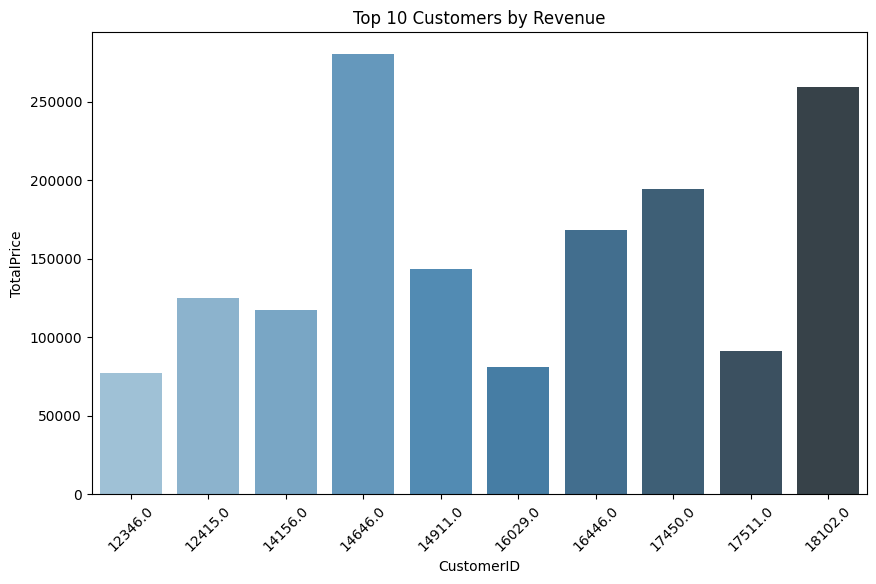

In [31]:
# Total revenue by customer
customer_revenue = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
print(customer_revenue.head())

# Plotting the top 10 customers by revenuek
top_10_customers = customer_revenue.sort_values(by='TotalPrice', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_10_customers, x='CustomerID', y='TotalPrice', palette='Blues_d')
plt.title('Top 10 Customers by Revenue')
plt.xticks(rotation=45)
plt.show()

Distribution of Invoices per Customer This will help in understanding how many invoices each customer has

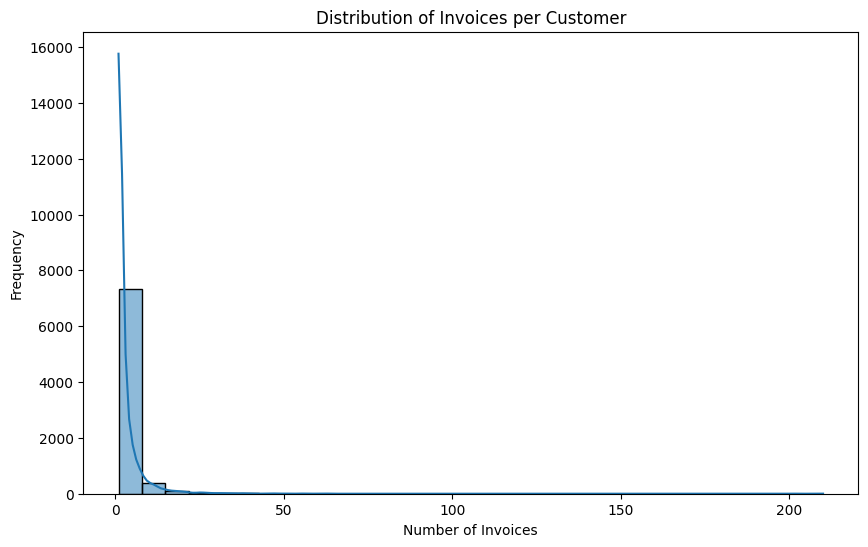

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(df.groupby('CustomerID')['InvoiceNo'].nunique(), bins=30, kde=True)
plt.title('Distribution of Invoices per Customer')
plt.xlabel('Number of Invoices')
plt.ylabel('Frequency')
plt.show()

Distribution of Total Price per Invoice

This plot shows the variation in total spending across different invoices.

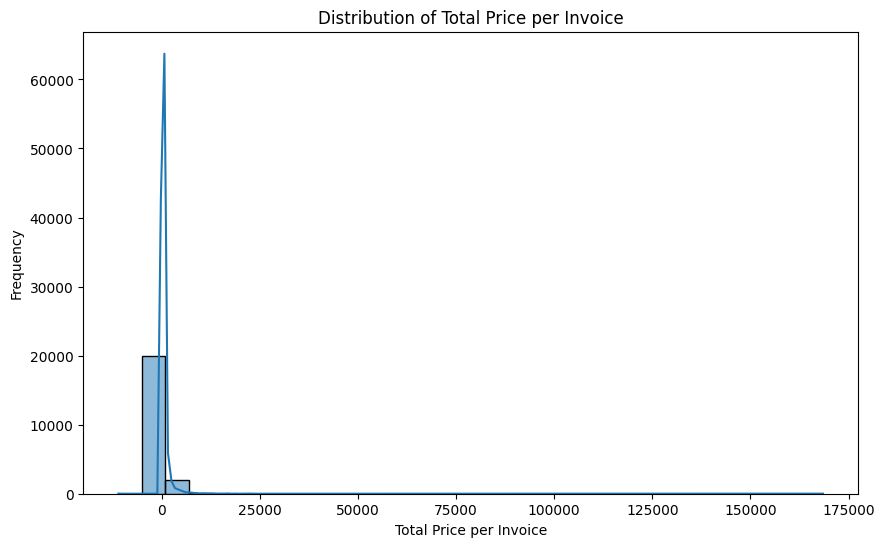

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(df.groupby('InvoiceNo')['TotalPrice'].sum(), bins=30, kde=True)
plt.title('Distribution of Total Price per Invoice')
plt.xlabel('Total Price per Invoice')
plt.ylabel('Frequency')
plt.show()

Total Sales by Country

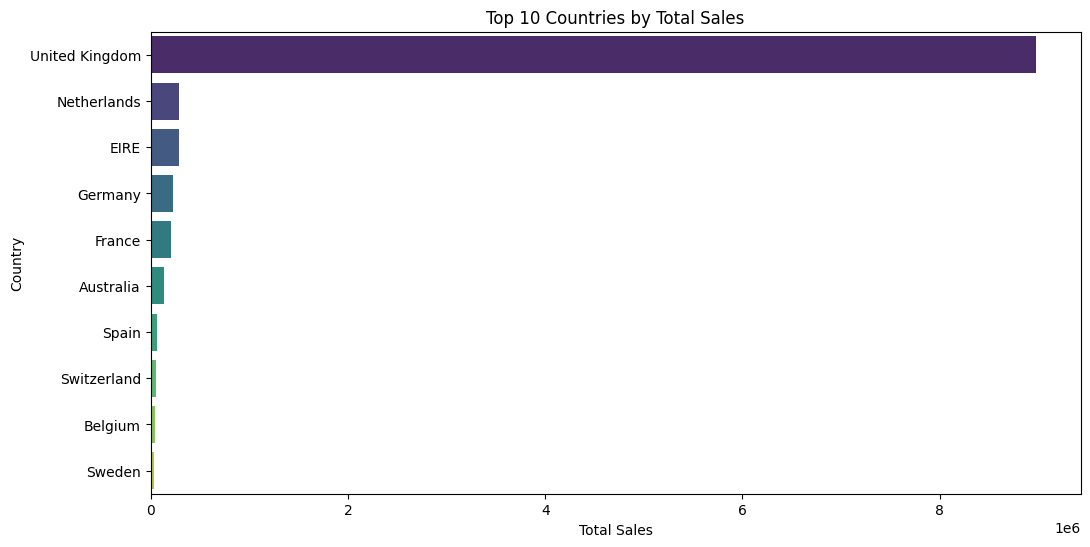

In [34]:
country_sales = df.groupby('Country')['TotalPrice'].sum().reset_index().sort_values(by='TotalPrice', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=country_sales.head(10), x='TotalPrice', y='Country', palette='viridis')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()

Sales by Day of the Week

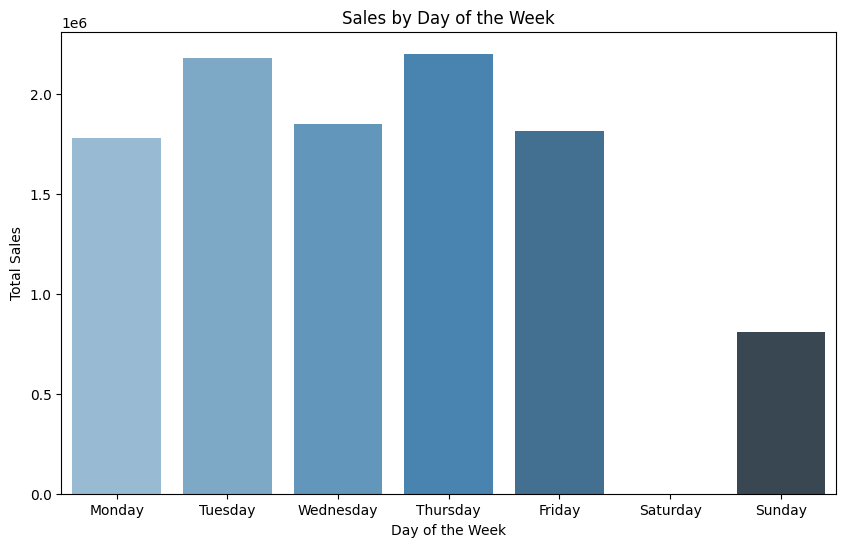

In [35]:
#Extract day of the week
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

sales_by_day = df.groupby('DayOfWeek')['TotalPrice'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='Blues_d')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

Customer Segmentation by Total Spending

You can group customers into different spending tiers to understand who your top, medium, and low spenders are.

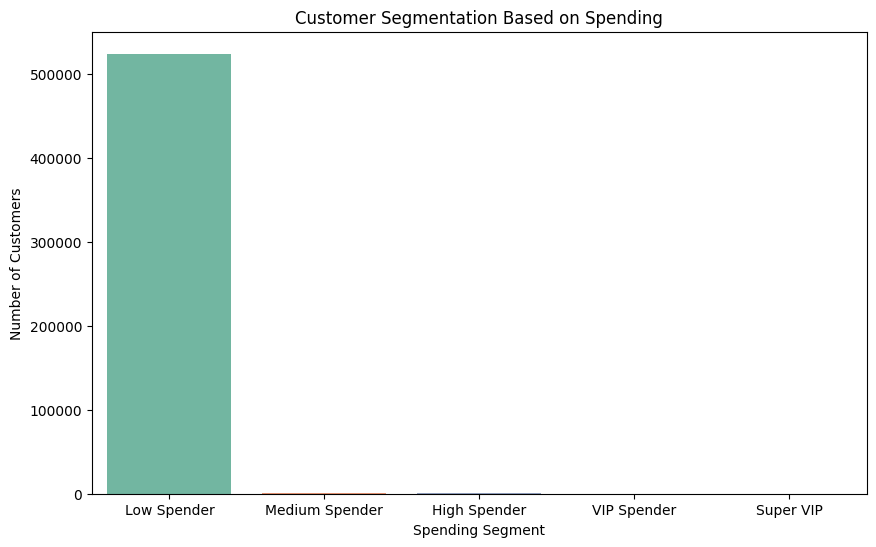

In [36]:
#Segment customers based on their total spending
spending_bins = [0, 500, 1000, 5000, 10000, df['TotalPrice'].max()]
spending_labels = ['Low Spender', 'Medium Spender', 'High Spender', 'VIP Spender', 'Super VIP']

df['Spending_Segment'] = pd.cut(df['TotalPrice'], bins=spending_bins, labels=spending_labels)

# Countplot to visualize customer segments
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Spending_Segment', palette='Set2')
plt.title('Customer Segmentation Based on Spending')
plt.xlabel('Spending Segment')
plt.ylabel('Number of Customers')
plt.show()

Top 10 Best-Selling Products Identifying your top-selling products can help focus your efforts on high-demand items.

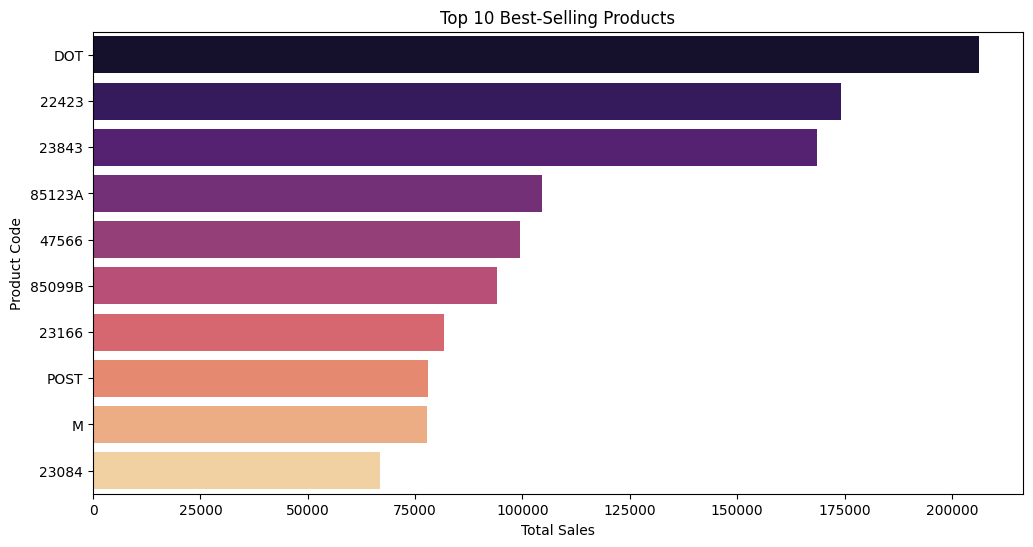

In [37]:
top_products = df.groupby('StockCode')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Code')
plt.show()

In [39]:
# Function to detect outliers based on IQR
def detect_outliers_iqr(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Outliers condition
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


In [40]:
outliers = detect_outliers_iqr(df, 'UnitPrice')
print(f'Outliers detected: {len(outliers)}')

Outliers detected: 37829


Visualizing Outliers with Boxplot:

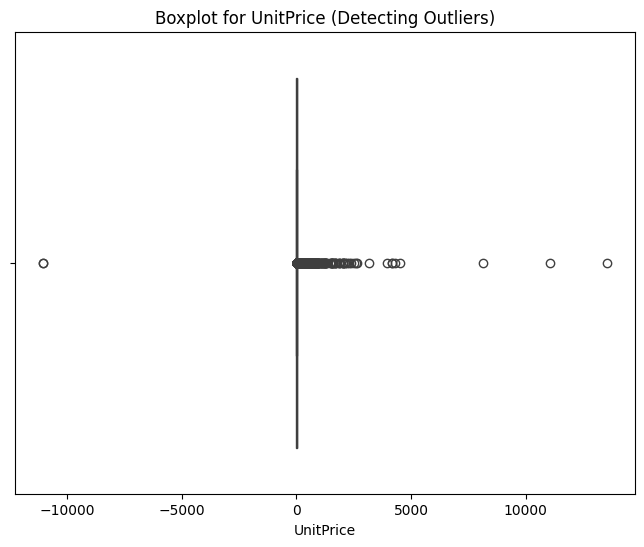

In [41]:
# Boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['UnitPrice'])
plt.title('Boxplot for UnitPrice (Detecting Outliers)')
plt.show()

In [42]:
outliers = detect_outliers_iqr(df, 'TotalPrice')
print(f'Outliers detected: {len(outliers)}')

Outliers detected: 42623


Impute Outliers

In [43]:

def impute_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Impute outliers with median value
    median = df[column].median()
    df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return df

# Impute outliers in 'UnitPrice'
df_crm_imputed = impute_outliers(df, 'UnitPrice')


#RFM Calculation RFM Analysis

RFM stands for Recency, Frequency, and Monetary value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.

RFM factors illustrate these facts:

The more recent the purchase, the more responsive the customer is to promotions The more frequently the customer buys, the more engaged and satisfied they are Monetary value differentiates heavy spenders from low-value purchasers RFM Metrics

In [44]:
print(df['InvoiceDate'].max())

2011-12-09 12:50:00


In [45]:
# Calculate Recency, Frequency, and Monetary values

#Setting a Reference Date, It’s used as a reference to calculate the recency (how long ago a customer made their last purchase)
today_date = dt.datetime(2011, 12, 11)

#The errors='coerce' argument converts any invalid date values to NaT (Not a Time)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')


rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (today_date - x.max()).days,  # Recency
    'InvoiceNo': lambda x: x.nunique(),  # Frequency (count of unique invoices)
    'TotalPrice': lambda x: x.sum()  # Monetary value (sum of transaction amounts)
})

# Rename the columns
rfm.columns = ['recency', 'frequency', 'monetary']

# Filter out customers with 0 or negative monetary value - Negative or zero values could indicate refunds, cancellations, or other anomalies.
rfm = rfm[rfm['monetary'] > 0].reset_index()

# Check the RFM table
rfm.head()

,CustomerID,recency,frequency,monetary
0,12346.0,326,1,77183.60
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40


#RFM Segmentation

In [46]:
#Define RFM score bins for each metric (convert the bins to string for later concatenation)
def get_rfm_scores(dataframe) -> pd.core.frame.DataFrame:
    # Copying the DataFrame:
    df = dataframe.copy()

    # pd.qcut divides the recency column into 5 bins (quintiles).
    df["recency_score"] = pd.qcut(df["recency"], 5, labels=[5, 4, 3, 2, 1])

    df["frequency_score"] = pd.qcut(
        df["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5]
    )
    df["monetary_score"] = pd.qcut(df["monetary"], 5, labels=[1, 2, 3, 4, 5])

    #RFM_SCORE: Concatenated score of recency and frequency.
    df["RFM_SCORE"] = df["recency_score"].astype(str) + df["frequency_score"].astype(
        str
    )

    return df

rfm = get_rfm_scores(rfm)

1.Customers with the lowest recency (most recent purchases) are given a higher score (5), and those with the highest recency (least recent purchases) are given a lower score (1).
This ranking makes sense because customers who bought more recently are considered more engaged or valuable.


2.Customers with a higher frequency of purchases are given a higher score (5), and those with lower purchase frequencies are given a lower score (1).
Ranking is applied before binning to ensure ties in frequency are handled consistently using the .rank(method="first"), which assigns a unique rank to each value in case of ties.

3.Similar to recency and frequency, the monetary column is divided into 5 bins.
Customers with higher monetary value (those who spent more) are assigned a higher score (5), and those with lower spending are assigned a lower score (1)

4.The recency_score and frequency_score are concatenated into a new column RFM_SCORE (e.g., a customer with a recency score of 5 and frequency score of 3 will have an RFM score of 53).
This combined score is used for segmenting customers into different categories, such as "best customers," "potential loyalists," "at-risk customers," etc.


Visualization

Text(0.5, 1.0, 'Monetary Distribution')

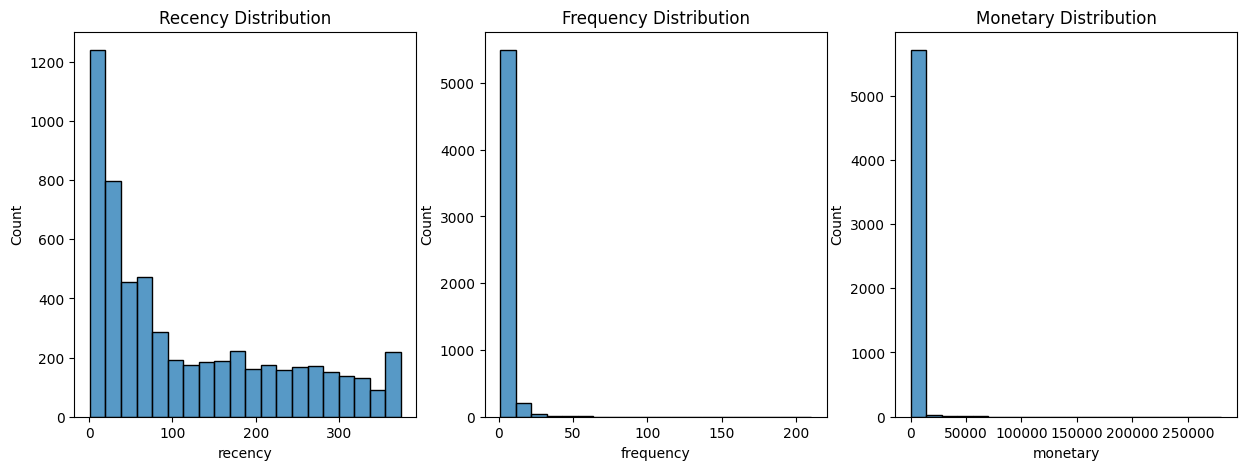

In [47]:
#Plot the distribution of Recency, Frequency, and Monetary
plt.figure(figsize=(15, 5))

#Recency Distribution
plt.subplot(1, 3, 1)
sns.histplot(rfm['recency'], bins=20)
plt.title('Recency Distribution')

#Frequency Distribution
plt.subplot(1, 3, 2)
sns.histplot(rfm['frequency'], bins=20)
plt.title('Frequency Distribution')

#Monetary Distribution
plt.subplot(1, 3, 3)
sns.histplot(rfm['monetary'], bins=20)
plt.title('Monetary Distribution')

The visualizations provide insights into the Recency, Frequency, and Monetary distributions of your customer data, which are key to RFM (Recency, Frequency, and Monetary) analysis. Here are the insights for each plot:

1. Recency Distribution (First plot)
Skewed Distribution: The majority of customers have very low recency scores (close to 0), indicating they made a purchase recently. This shows that a large portion of the customers are actively engaging with the store.

Tail of Inactive Customers: There is a long tail of customers with high recency scores (greater than 100-300), which means these customers haven't made a purchase for a long time and may be at risk of churning.

Potential Focus: You can target the customers with higher recency scores (less recent purchases) for re-engagement campaigns to bring them back to the platform.

2. Frequency Distribution (Second plot)
Highly Concentrated at Low Frequency: Most customers made only one or very few purchases, as the distribution is heavily skewed towards the lower frequency values.

Very Few Repeat Buyers: The number of customers with a high frequency of purchases is minimal. This suggests that there might be an opportunity to improve customer retention strategies and increase repeat purchases.

Strategy: Loyalty programs or personalized incentives might help convert these one-time customers into repeat buyers, increasing customer lifetime value.
3. Monetary Distribution (Third plot)

Extreme Skew: The monetary distribution is heavily skewed, with most customers having spent relatively small amounts. A few customers have made significantly higher purchases, leading to a small number of high spenders.

Key Insight: There are outliers in terms of high monetary value, indicating the presence of a small group of very valuable customers.

Focus Area: Efforts to retain and nurture this small group of high spenders (VIP customers) could yield high returns, while strategies to encourage more spending from the lower monetary segment might be beneficial.

#Overall Insights:
Engagement and Retention: Most of your customers are recent buyers, but there's a large number of one-time customers. Engaging these one-time customers to increase frequency could drive significant revenue growth.

Churn Risk: The customers with high recency (who haven't bought in a while) need attention. Offering them incentives to return could help reduce churn.

High-Value Customers: A few customers contribute a substantial portion of the revenue. Developing personalized experiences for these high spenders could further strengthen their loyalty and increase their lifetime value.

In [48]:
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}

rfm['segment'] =  rfm["RFM_SCORE"] .replace(seg_map, regex = True)

rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,12346.0,326,1,77183.60,1,1,5,11,hibernating
1,12347.0,3,7,4310.00,5,5,5,55,champions
2,12348.0,76,4,1797.24,3,4,4,34,loyal_customers
3,12349.0,19,1,1757.55,4,1,4,41,promising
4,12350.0,311,1,334.40,1,1,2,11,hibernating


#Customer Segmentation Insights:

Hibernating ([1-2][1-2])

Description: These customers have both low recency and low frequency scores, indicating they haven't purchased in a long time and likely have made very few purchases in the past.
Action: Consider re-engagement campaigns (e.g., discounts or special offers) to bring them back. They may also be at risk of churning entirely.

At Risk ([1-2][3-4])

Description: These customers haven't purchased recently but used to buy somewhat frequently in the past.
Action: Target them with win-back strategies like personalized emails or special promotions to avoid churn. Their prior buying behavior suggests they might come back with the right incentives.

Can’t Lose ([1-2]5)

Description: These are high-value customers who haven’t purchased recently. Despite their inactivity, they are important because they were frequent buyers.
Action: It's crucial to reactivate this segment by offering exclusive incentives or personalized experiences. They have the potential to generate significant revenue if they return.

About to Sleep (3[1-2])

Description: These customers are close to becoming inactive (mid-range recency and low frequency).
Action: Engage them with targeted messaging before they lapse into inactivity. They might just need a nudge to re-engage.

Need Attention (33)

Description: Customers in this group show average scores for both recency and frequency. They're not highly engaged but could be persuaded to increase their activity.
Action: Provide incentives to boost their engagement. Nurturing this group could turn them into more loyal customers.

Loyal Customers ([3-4][4-5])

Description: These are frequent buyers with a strong purchasing history. They are responsible for a significant share of your business.
Action: Reward their loyalty with exclusive benefits, loyalty programs, or early access to new products. Maintaining their relationship is key.
Promising (41)

Description: These customers have made a recent purchase but haven't yet established a frequent purchasing pattern.
Action: Encourage repeat purchases through targeted marketing campaigns. These customers are likely to become more valuable with the right nudges.
New Customers (51)

Description: These are brand new customers who have just made their first purchase.
Action: Focus on onboarding and nurturing these customers with personalized messaging and product recommendations to convert them into loyal, repeat buyers.

Potential Loyalists ([4-5][2-3])

Description: Customers in this segment show potential to become loyal buyers based on their recency and frequency patterns.
Action: Offer incentives, such as discounts or loyalty rewards, to encourage more frequent purchases and build a long-term relationship.

Champions (5[4-5])

Description: These are your best customers. They buy frequently and spend the most. They are the core of your business and likely advocates for your brand.
Action: Make sure they feel appreciated with VIP treatment, personalized offers, and loyalty rewards. Retaining this segment is essential to maintain revenue growth.

Key Takeaways:
Loyal Customers and Champions represent high-value segments and should be prioritized for retention through loyalty programs and special perks.
At Risk, Can't Lose, and Hibernating customers need targeted re-engagement strategies to prevent churn, especially since some were previously high-value.
New Customers, Promising, and Potential Loyalists have the potential to increase their frequency and monetary value with the right nurturing and marketing strategies.
By focusing on each segment's specific needs and behaviors, you can create tailored marketing strategies to boost customer engagement, retention, and ultimately, revenue.

In [49]:
print(rfm['segment'].nunique())
print(rfm['segment'].unique())

10
['hibernating' 'champions' 'loyal_customers' 'promising'
 'potential_loyalists' 'need_attention' 'at_Risk' 'new_customers'
 'cant_loose' 'about_to_sleep']


Segmentation Map

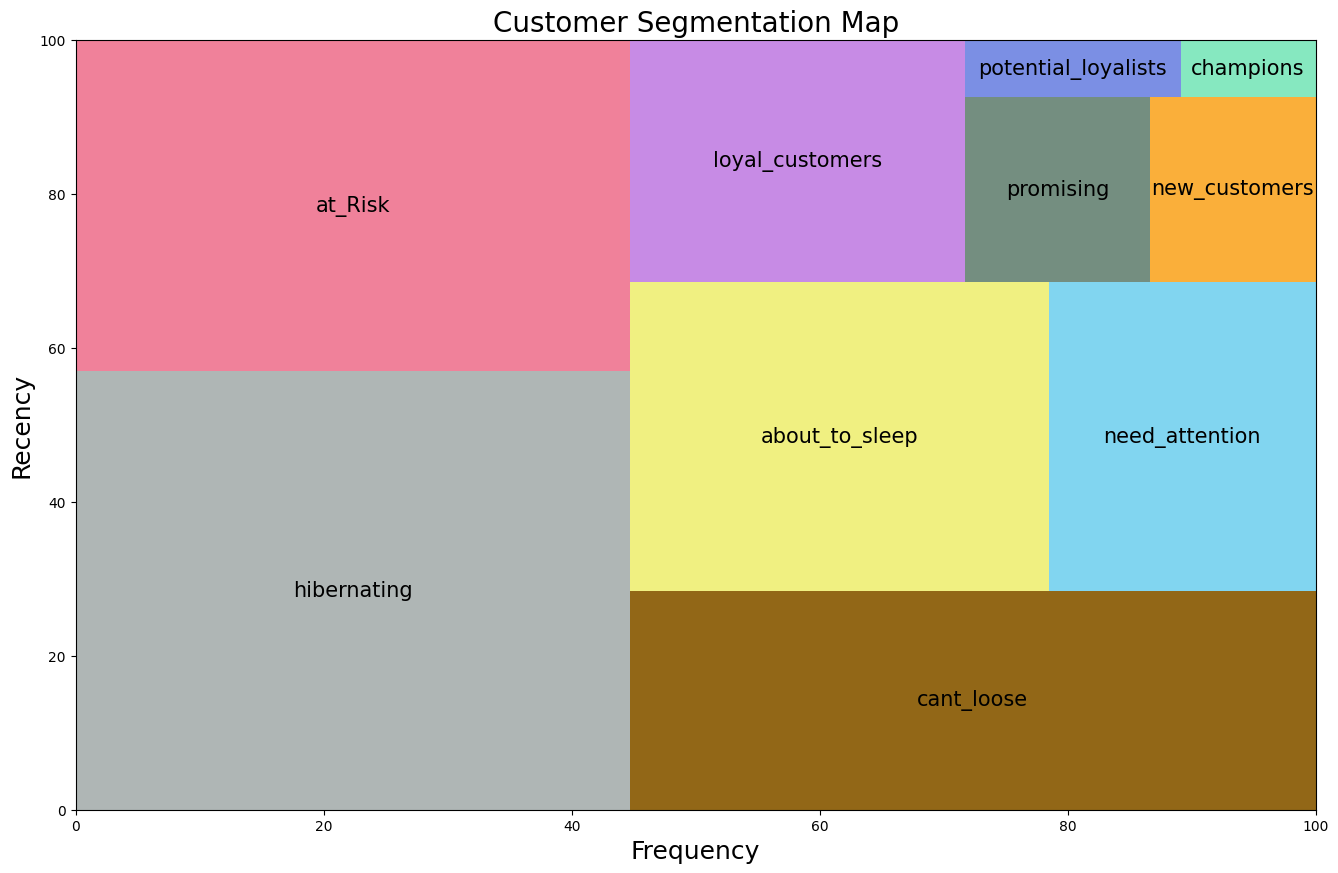

In [50]:
segments = rfm['segment'].value_counts().sort_values(ascending=False)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
squarify.plot(
    sizes=segments,
    label=[label for label in seg_map.values()],
    color=[
        "#AFB6B5",
        "#F0819A",
        "#926717",
        "#F0F081",
        "#81D5F0",
        "#C78BE5",
        "#748E80",
        "#FAAF3A",
        "#7B8FE4",
        "#86E8C0",
    ],
    pad=False,
    bar_kwargs={"alpha": 1},
    text_kwargs={"fontsize": 15},
)
plt.title("Customer Segmentation Map", fontsize=20)
plt.xlabel("Frequency", fontsize=18)
plt.ylabel("Recency", fontsize=18)
plt.show()

The size of each block in the treemap reflects the number of customers in each segment, offering a visual representation of where the bulk of your customer base lies.


Segment Prioritization:

Larger blocks (e.g., "hibernating" or "loyal customers") might indicate a need to focus more resources on these segments. For instance, loyal customers and champions should receive rewards, while hibernating and at risk customers should be targeted with re-engagement efforts.
For smaller segments like new customers or promising, personalized campaigns can nurture these customers to increase their lifetime value.

Actionable Strategies:

Use this visualization to communicate which segments should be targeted for growth (e.g., new customers, potential loyalists) and which ones require retention efforts (e.g., champions, loyal customers).
Stakeholders can see which segments might require urgent action, such as can’t lose or at risk, where interventions like special promotions or win-back campaigns could make a significant difference in preventing customer churn.


Segmentation Impact on Revenue:

By correlating the size of segments with their contribution to overall revenue (using RFM scores), you can identify high-value segments (e.g., champions and loyal customers) and communicate their importance in sustaining the company's financial health.
You can also demonstrate the potential financial upside if smaller but promising segments like new customers are successfully nurtured into more valuable categories like loyal customers.

Let’s choose 3 segments that we find important. These three segments

In [51]:
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count","max"])

recency             frequency                monetary  \
                           mean count  max       mean count  max         mean   
segment                                                                         
about_to_sleep        78.983740   492  115   1.000000   492    1   664.084108   
at_Risk              246.650895   782  374   1.781330   782    4  1029.685270   
cant_loose           187.276596    47  373   6.978723    47   34  2015.678936   
champions              8.491189   908   18  10.262115   908  210  5615.236079   
hibernating          236.394290  1471  374   1.000000  1471    1   652.072651   
loyal_customers       49.257194  1112  115   5.077338  1112   63  2158.469076   
need_attention        69.241546   207  115   1.690821   207    2   797.557295   
new_customers         10.053333    75   18   1.000000    75    1   337.266400   
potential_loyalists   23.475904   498   50   1.437751   498    2  1404.495643   
promising             33.252688   186   50   1.000000   186    1   363.180753   

                                      
                    count        max  
segment                               
about_to_sleep        492    5557.66  
at_Risk               782   44534.30  
cant_loose             47    7832.47  
champions             908  280206.02  
hibernating          1471   77183.60  
loyal_customers      1112  124914.53  
need_attention        207    7829.89  
new_customers          75    3861.00  
potential_loyalists   498   52940.94  
promising             186    6207.67

Champions About to Sleep Can’t Loose

Champions There are 905 people in this group. They do not shop for an average of 8.47 days. They shopped an average of 10.28 times. They earned an average of 5631.84 units of money.

Action Decision That Can Be Taken for Champions: The best customers are the last, the most frequent purchasers and the ones who contribute the most to the company because finding a new customer is always the hardest. We can categorize them as a premium customer and give prime offers such as free shipping.

About to Sleep There are 355 people in this segment, They do not shop for an average of 74.20 days. They shopped an average of 1.00 times. They earned an average of 451.74 units of money.

Action Decision That Can Be Taken for About to Sleep: We can give them discount checks which will encourage them to purchase from our company.

Can’t Loose There are 48 people in this segment, They do not shop for an average of 185.77 days. They shopped an average of 7.0 times. They earned an average of 2054.09 units of money.

Action Decision That Can Be Taken for Can’t Loose: It is one of the segments that should be given importance. These people categorized as can’t lose might become a champions. We can send notifacations about privilege of premium customers and why they should become one of them

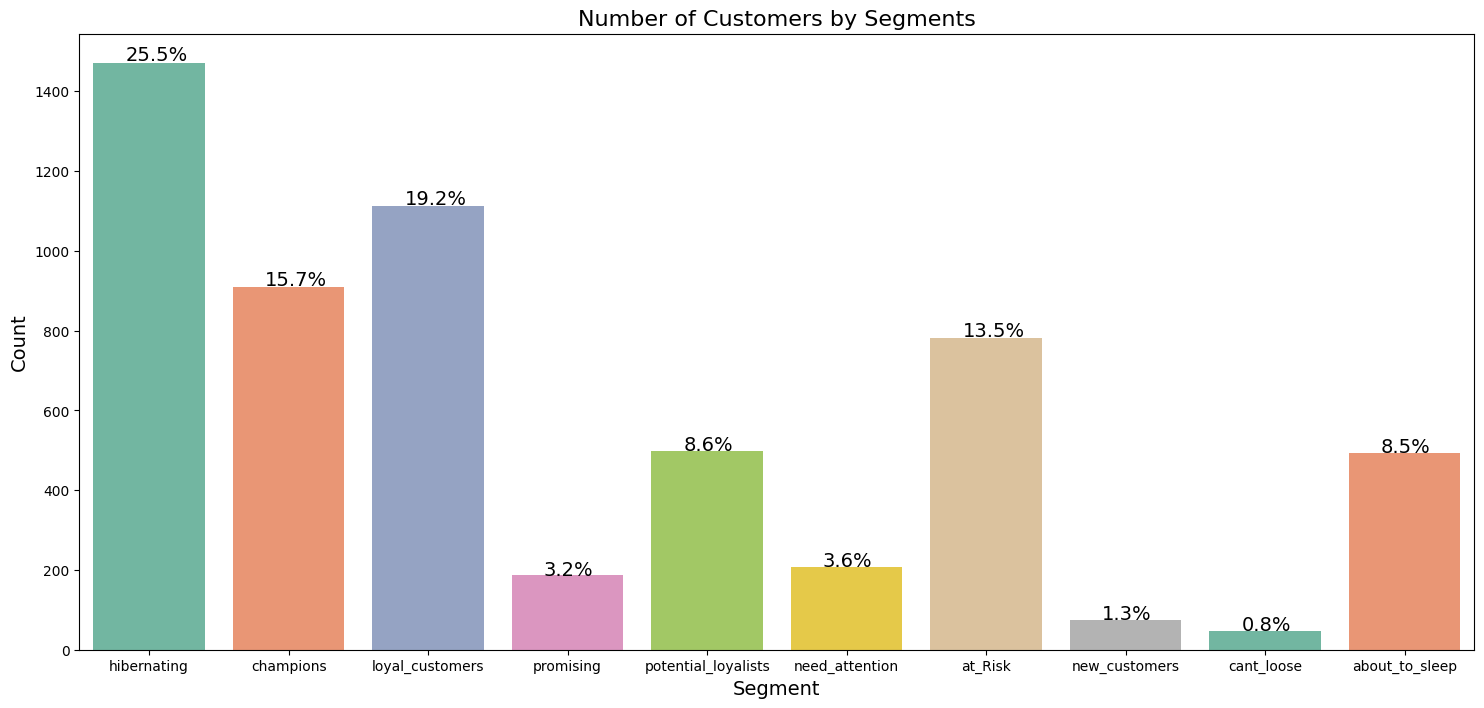

In [85]:
palette = sns.color_palette("Set2")
plt.figure(figsize = (18, 8))
ax = sns.countplot(data = rfm,
                   x = 'segment',
                   palette = palette)
total = len(rfm.segment)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)
plt.title('Number of Customers by Segments', size = 16)
plt.xlabel('Segment', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

Focus on Critical Segments:

Larger segments like hibernating or loyal customers could indicate where most customers fall. This can lead to discussions about resource allocation—whether the company should focus more on retaining loyal customers or re-engaging hibernating ones.
Smaller segments like new customers or promising may still represent potential growth opportunities, so stakeholders can assess how to maximize value from these groups by focusing on nurturing these relationships.

Opportunities for Marketing Strategy Adjustments:

Stakeholders can see at a glance if segments such as champions and loyal customers—those that represent high-value customers—are well-represented, or if the company needs to make efforts to expand these groups through customer loyalty programs.
If there are a significant number of customers in the at risk or can’t lose segments, it may highlight an urgent need for retention initiatives, like targeted campaigns, to prevent churn and secure revenue.

Overall Customer Health:

The chart provides an overview of the company’s customer health, where high-value customers are plotted against those at risk of leaving. This insight allows stakeholders to prioritize retention programs or win-back strategies for vulnerable customers and reinforce brand loyalty where it's strong.

Visual Impact for Decision-Making:

This plot, combined with the previous segmentation map, reinforces a data-driven approach to customer engagement strategies, helping stakeholders to visualize where the biggest opportunities or risks lie in their customer base.

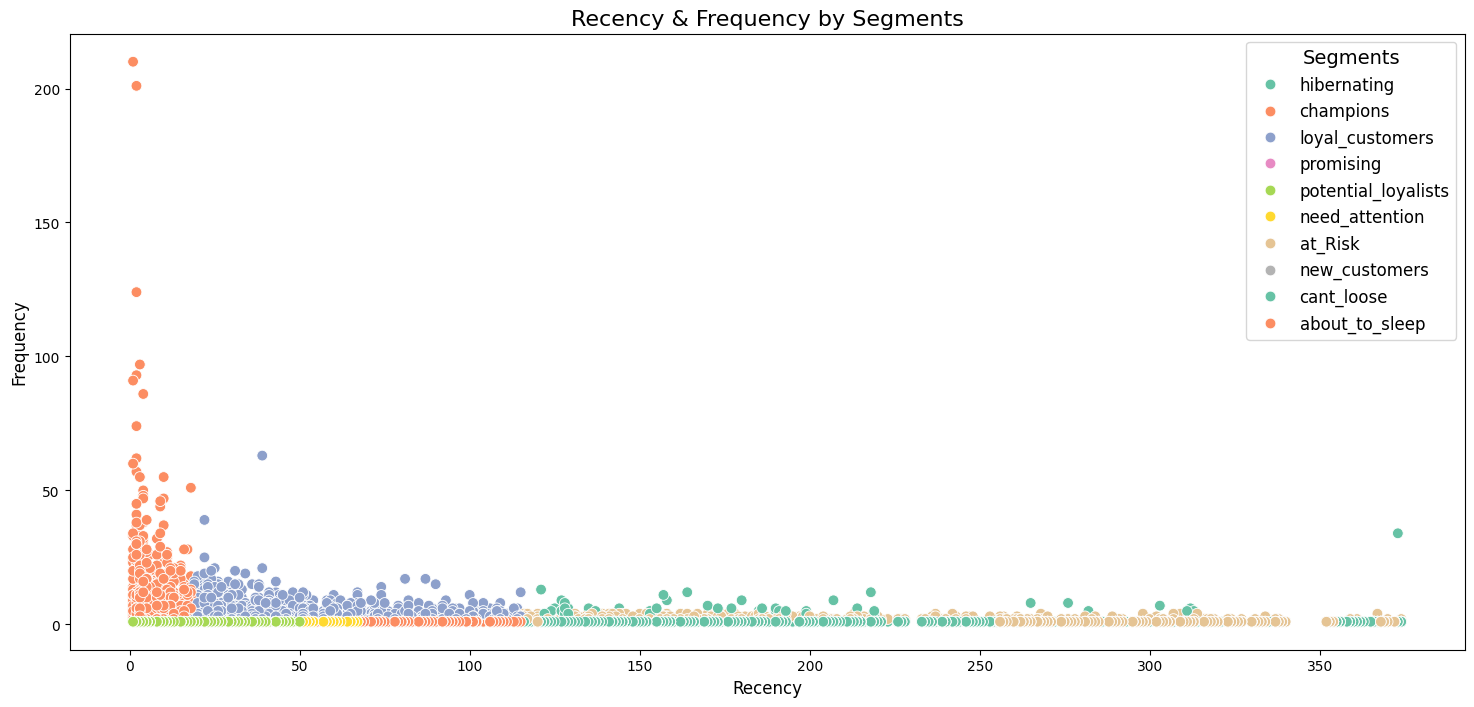

In [86]:
plt.figure(figsize=(18, 8))
sns.scatterplot(
    data=rfm, x="recency", y="frequency", hue="segment", palette=palette, s=60
)
plt.title("Recency & Frequency by Segments", size=16)
plt.xlabel("Recency", size=12)
plt.ylabel("Frequency", size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc="best", fontsize=12, title="Segments", title_fontsize=14)
plt.show()

The scatter plot you've provided is an effective way to visually showcase how different customer segments behave in terms of recency (how recently a customer made a purchase) and frequency (how often they make purchases). Here are the insights you can present based on this visualization:

Insights from "Recency & Frequency by Segments" Plot:
Segment Distribution by Behavior:

The scatter plot shows how customers from different segments (like hibernating, loyal customers, champions, etc.) are distributed across the two key metrics—recency and frequency.
Segments with low recency and low frequency (e.g., hibernating, at risk) likely consist of customers who haven't purchased in a while and do not buy frequently, indicating they may be at risk of churn.
Conversely, high-frequency and low-recency customers, such as those in the loyal customers or champions segments, reflect those who buy frequently and have made recent purchases. These customers are critical for business growth and retention efforts.
Recency & Frequency as Indicators of Customer Loyalty:

Champions and loyal customers tend to have low recency (meaning they’ve purchased recently) and high frequency (they purchase often). These are high-value customers who contribute significantly to revenue.
Identifying customers in this area helps stakeholders understand who to prioritize for loyalty programs, VIP offers, or exclusive deals, to maintain their engagement and increase lifetime value.
Target Areas for Re-engagement:

Segments like hibernating or at risk, which have high recency (i.e., haven't purchased recently) and low frequency, are prime targets for re-engagement campaigns. By offering incentives like discounts or personalized communications, these customers might be encouraged to return and purchase again.
Customer Frequency Trends:

Customers with high frequency but increasing recency could be "potential loyalists" who are drifting away. Recognizing these patterns early can enable marketing teams to take action and prevent churn through retention strategies.
The plot shows whether segments like new customers have high recency but low frequency, helping the team understand that while these customers recently joined, they need nurturing to move toward higher-frequency purchases.
Strategic Business Insights:

By visualizing both recency and frequency for each segment, stakeholders can make informed decisions about how to tailor marketing strategies, loyalty programs, and promotions for each group, boosting customer retention and increasing the likelihood of repeat purchases.

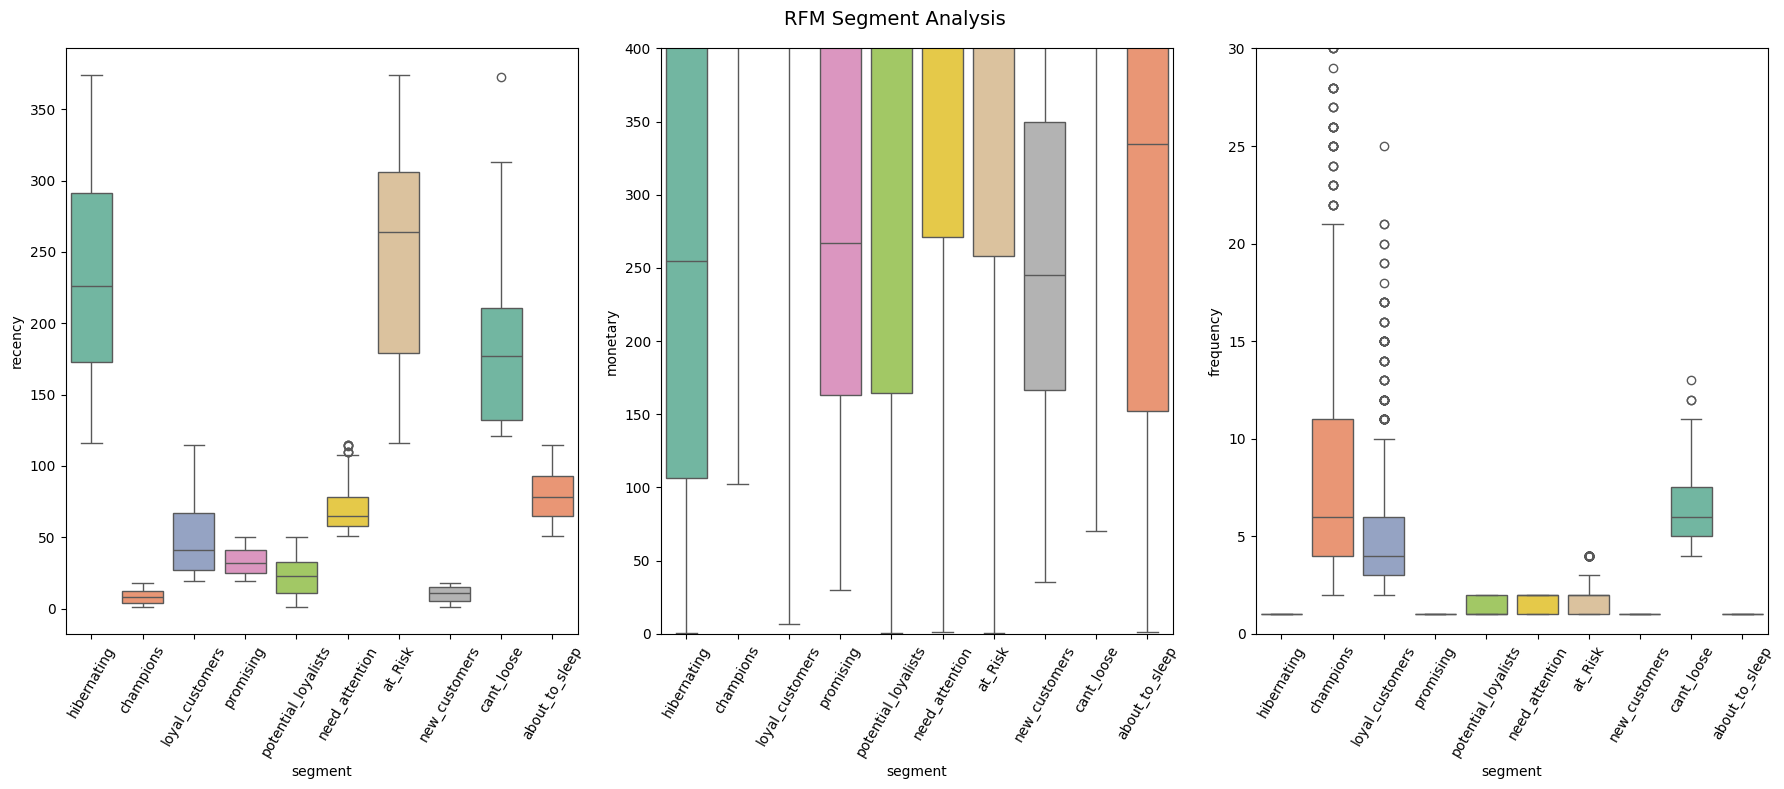

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle("RFM Segment Analysis", size=14)
feature_list = ["recency", "monetary", "frequency"]
for idx, col in enumerate(feature_list):
    sns.boxplot(
        ax=axes[idx], data=rfm, x="segment", y=feature_list[idx], palette=palette
    )
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
    if idx == 1:
        axes[idx].set_ylim([0, 400])
    if idx == 2:
        axes[idx].set_ylim([0, 30])
plt.tight_layout()
plt.show()

This box plot visualization is an excellent way to present the distribution of recency, monetary, and frequency metrics across the customer segments. Here's how you can present the insights from the RFM Segment Analysis boxplots:

Insights from the Boxplots for RFM Segments:
1. Recency Analysis:
Recency measures how recently a customer made a purchase.
Segments like champions and loyal customers generally have the lowest recency values, indicating that these customers have made purchases very recently, making them high-priority for retention and relationship building.
Segments like hibernating and at risk show higher recency values, meaning these customers haven’t purchased in a while and are likely becoming inactive. They would benefit from re-engagement campaigns, such as special promotions or personalized outreach.
2. Monetary Analysis:
Monetary measures the total amount spent by a customer.
Segments like champions and loyal customers clearly demonstrate higher monetary values, which makes sense as these are high-value customers who frequently purchase and contribute significantly to the company’s revenue.
On the other hand, segments such as hibernating and at risk have lower monetary values, which indicates they either purchase infrequently or with lower transaction amounts.
Potential Loyalists may also show a rising monetary trend but need more nurturing to shift them into higher-value segments like champions.
3. Frequency Analysis:
Frequency refers to how often customers make purchases.
Champions and loyal customers have the highest frequency, validating their importance as key contributors to recurring revenue.
New customers and potential loyalists segments have moderate frequency, highlighting them as customers with potential to grow if targeted effectively with engagement strategies.
Hibernating customers tend to have very low purchase frequency, which reflects their declining engagement and reinforces the need for retention strategies.
Key Takeaways:
Champions and Loyal Customers: These segments have the best performance across all three metrics—low recency, high frequency, and high monetary values. Focus on retention efforts such as loyalty programs, VIP experiences, and targeted rewards to maintain engagement.

Hibernating and At Risk: These segments perform poorly across all metrics, indicating they are at risk of churn. Re-engagement campaigns (such as discounts, targeted communication) could potentially recover some customers.

Potential Loyalists: This segment shows promise, with moderate frequency and monetary value. Nurturing this group through personalized offers or product recommendations could help elevate them into the champion segment.

Segment Customization: Using this data, marketing teams can develop custom strategies for each group, ensuring better allocation of resources to high-value customers and reactivating low-engagement customers.

These insights provide a data-driven framework for stakeholders to craft targeted marketing campaigns, customer retention strategies, and improve overall customer lifetime value (CLV). Would you like to explore recommendations for specific segment engagement strategies?

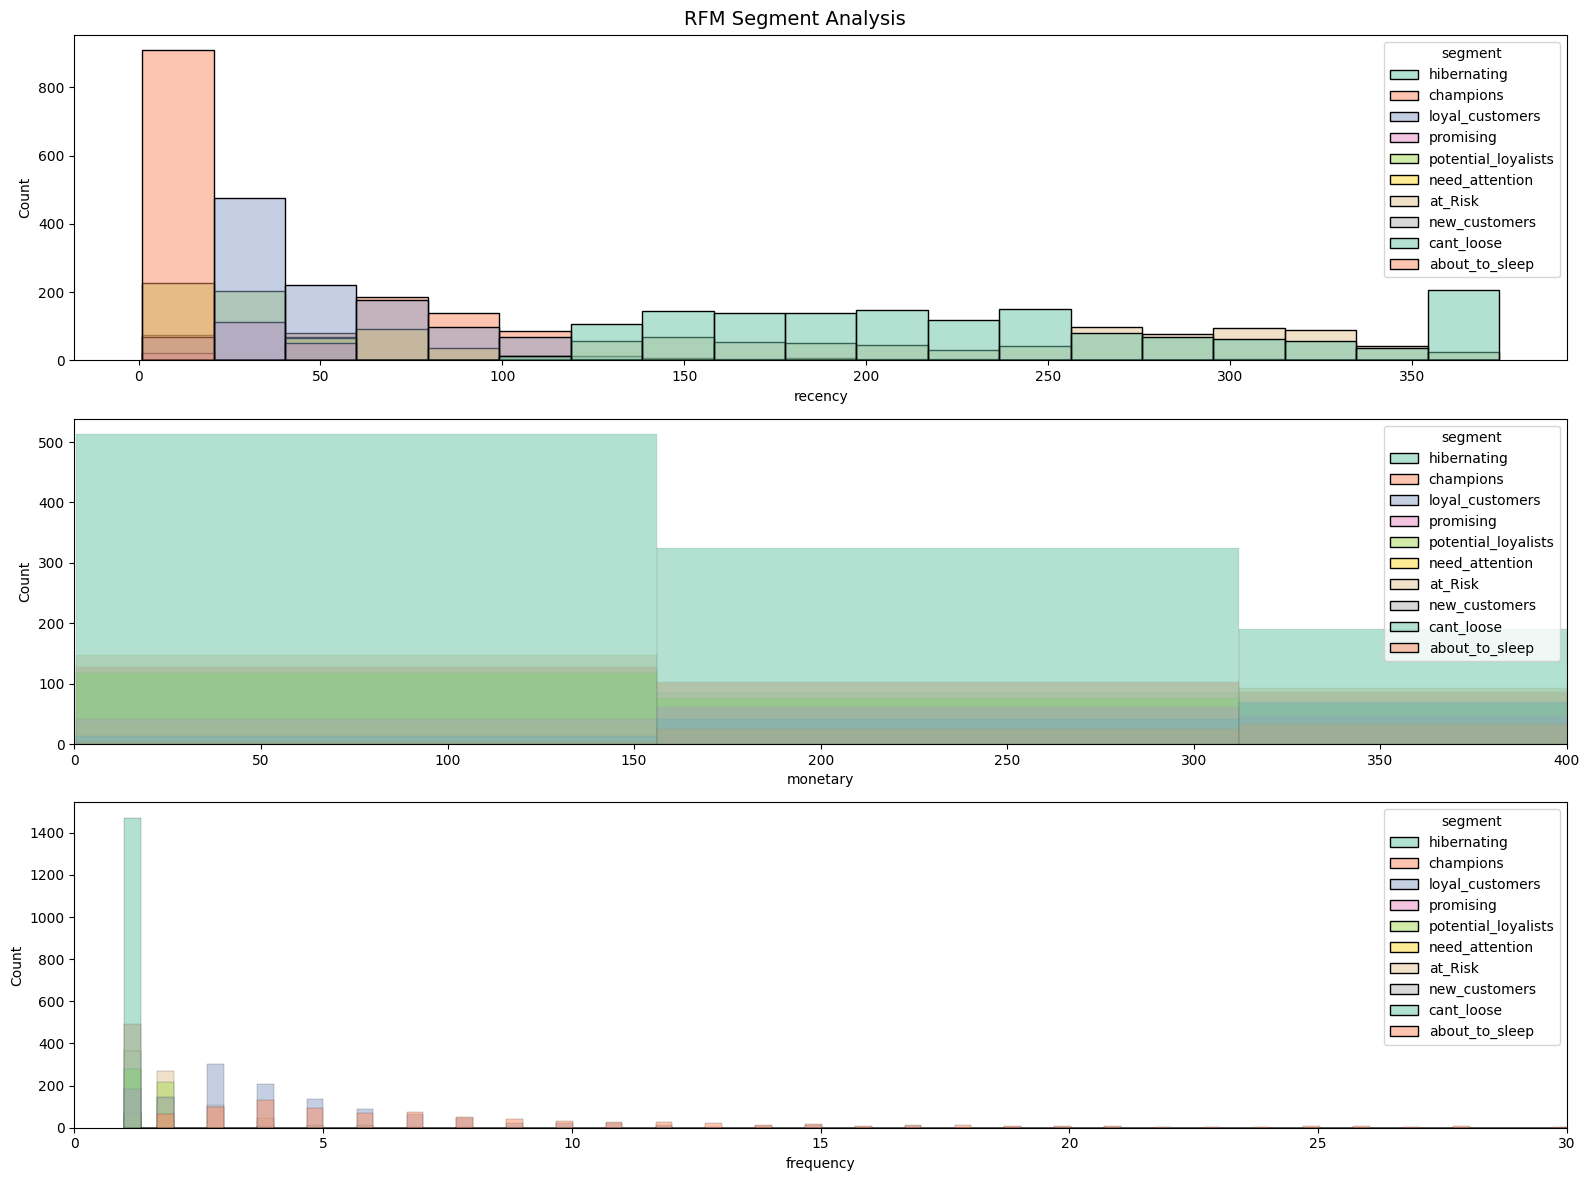

In [88]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
fig.suptitle('RFM Segment Analysis', size = 14)
feature_list = ['recency', 'monetary', 'frequency']
for idx, col in enumerate(feature_list):
    sns.histplot(ax = axes[idx], data = rfm,
                 hue = 'segment', x = feature_list[idx],
                 palette= palette)
    if idx == 1:
        axes[idx].set_xlim([0, 400])
    if idx == 2:
        axes[idx].set_xlim([0, 30])
plt.tight_layout()
plt.show()

The histogram plots you've generated provide valuable insights into the distribution of recency, monetary, and frequency metrics across different customer segments. Here’s how you can interpret and present insights based on these histograms:

Insights from the RFM Segment Analysis Histograms
1. Recency Distribution:
Distribution Shape: The histogram shows a right-skewed distribution, indicating that many customers have made recent purchases.
Segment Behavior:
Champions and Loyal Customers are concentrated on the lower recency side (0-50 days), suggesting they have purchased recently.
Hibernating and At Risk segments dominate the higher recency ranges (100+ days), indicating these customers have not engaged with the brand for some time and may require targeted re-engagement strategies.
2. Monetary Distribution:
Concentration of Spending: The histogram for monetary values shows a significant number of customers with low total spending, with a few high-value customers driving the upper end of the distribution.
Segment Insights:
Champions and Loyal Customers are identifiable in the higher monetary ranges (150+), representing the bulk of the revenue.
Hibernating customers are mostly in the lower monetary ranges, which reinforces the need to understand why they are not spending and develop strategies to re-engage them effectively.
The restriction of the x-axis to 400 allows for better visualization of the active customer segments, emphasizing the need to target those who can elevate their spending levels.
3. Frequency Distribution:
Frequency Insights: The frequency histogram is also right-skewed, with most customers making very few purchases.
Segment Analysis:
Champions show a concentration in the higher frequency ranges (5+ purchases), indicating strong engagement with the brand.
New Customers and Potential Loyalists typically fall into the lower frequency ranges (1-2 purchases), suggesting that while they have made a purchase, they have not yet developed loyalty. Targeted communications and follow-up strategies are essential for increasing their frequency.
Key Takeaways for Stakeholders:
Customer Segmentation Strategy: These insights emphasize the importance of understanding customer behavior based on their recency, frequency, and monetary value. Effective segmentation can lead to more personalized and effective marketing strategies.

Re-engagement Plans: Customers in the Hibernating and At Risk segments require immediate attention through targeted promotions or personalized communication to drive them back to active status.

Investment in Champions: The brand should invest in retaining champions and loyal customers through loyalty programs, exclusive offers, and personalized experiences to maximize their lifetime value.

Nurturing Potential Loyalists: Developing targeted campaigns that encourage new customers to make repeat purchases can help transition them into loyal customers, thereby increasing overall revenue.



1. Descriptive Statistics

In [89]:
# Descriptive Statistics for frequency and monetary
desc_stats = rfm[['frequency', 'monetary']].describe()
print("Descriptive Statistics:")
print(desc_stats)

# Total revenue
total_revenue = rfm['monetary'].sum()
print(f"Total Revenue: {total_revenue}")

# Average customer purchase frequency and spending
average_frequency = rfm['frequency'].mean()
average_spending = rfm['monetary'].mean()
print(f"Average Frequency: {average_frequency}")
print(f"Average Spending: {average_spending}")

Descriptive Statistics:
         frequency       monetary
count  5778.000000    5778.000000
mean      3.457079    1841.832953
std       6.825502    7905.296292
min       1.000000       0.420000
25%       1.000000     237.422500
50%       1.000000     630.200000
75%       4.000000    1636.237500
max     210.000000  280206.020000
Total Revenue: 10642110.804000001
Average Frequency: 3.4570785739010037
Average Spending: 1841.8329532710284


2. Visualizations a. Histogram of Customer Purchases (Frequency)

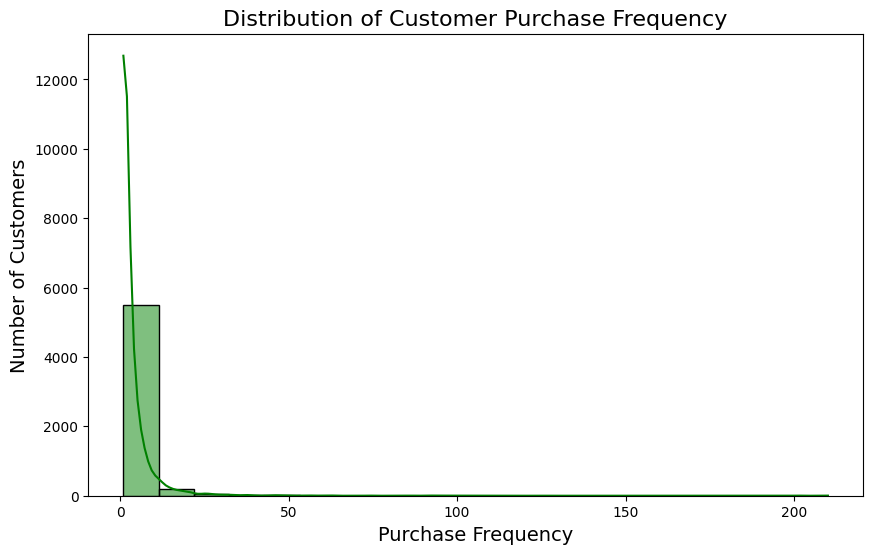

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for customer purchase frequency
plt.figure(figsize=(10, 6))
sns.histplot(rfm['frequency'], bins=20, kde=True, color='green')
plt.title('Distribution of Customer Purchase Frequency', fontsize=16)
plt.xlabel('Purchase Frequency', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.show()

b. Boxplot for Customer Spending (Monetary)

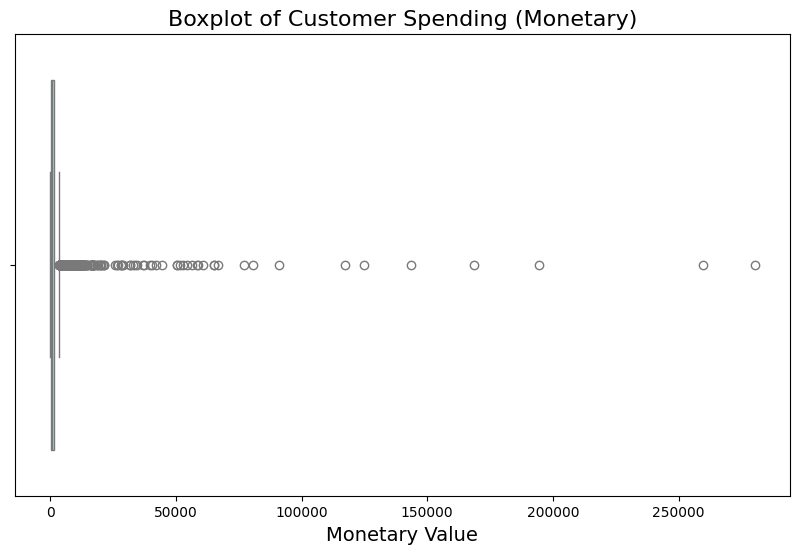

In [91]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='monetary', data=rfm, color='lightblue')
plt.title('Boxplot of Customer Spending (Monetary)', fontsize=16)
plt.xlabel('Monetary Value', fontsize=14)
plt.show()

c. Correlation Heatmap of RFM Features The heatmap helps visualize the correlation between Recency, Frequency, and Monetary values to identify any strong relationships between them.

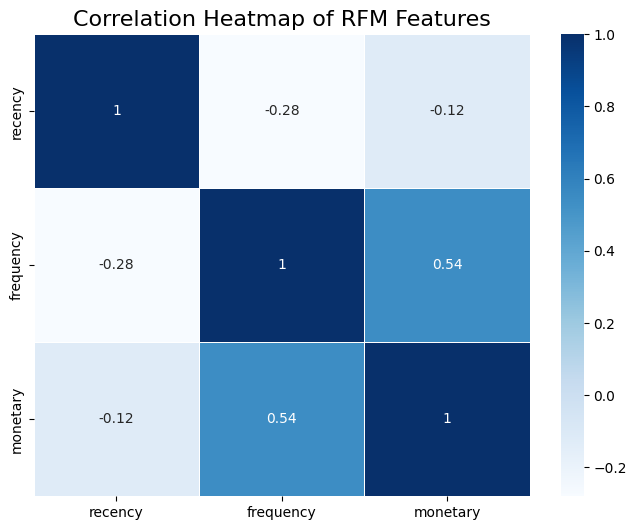

In [92]:
# Correlation heatmap of Recency, Frequency, and Monetary
plt.figure(figsize=(8, 6))
corr_matrix = rfm[['recency', 'frequency', 'monetary']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Heatmap of RFM Features', fontsize=16)
plt.show()

Customer Segmentation a. Distribution of Customer Segments You can group customers based on their RFM score and visualize the distribution of different segments.

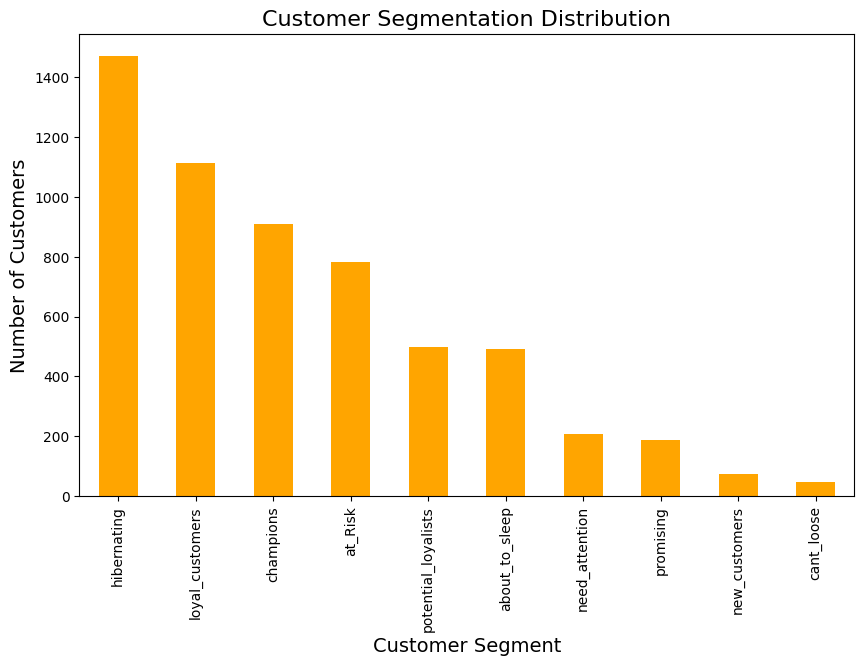

In [93]:
segment_distribution = rfm['segment'].value_counts()

# Bar plot for segment distribution
plt.figure(figsize=(10, 6))
segment_distribution.plot(kind='bar', color='orange')
plt.title('Customer Segmentation Distribution', fontsize=16)
plt.xlabel('Customer Segment', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.show()

b. Transaction Trends by Day of the Week


To explore if certain days of the week have higher customer activity.

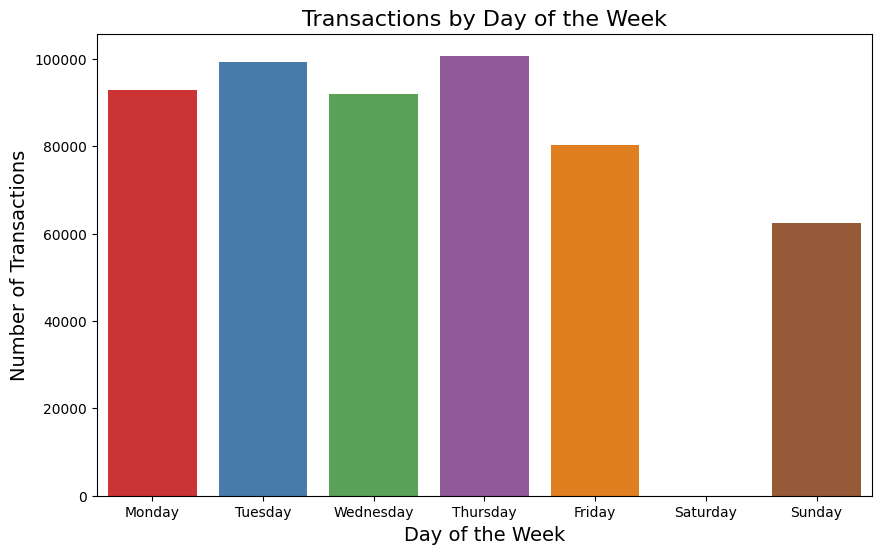

In [95]:
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

# Plot the frequency of transactions by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Set1')
plt.title('Transactions by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.show()

c. Transaction Trends by Hour

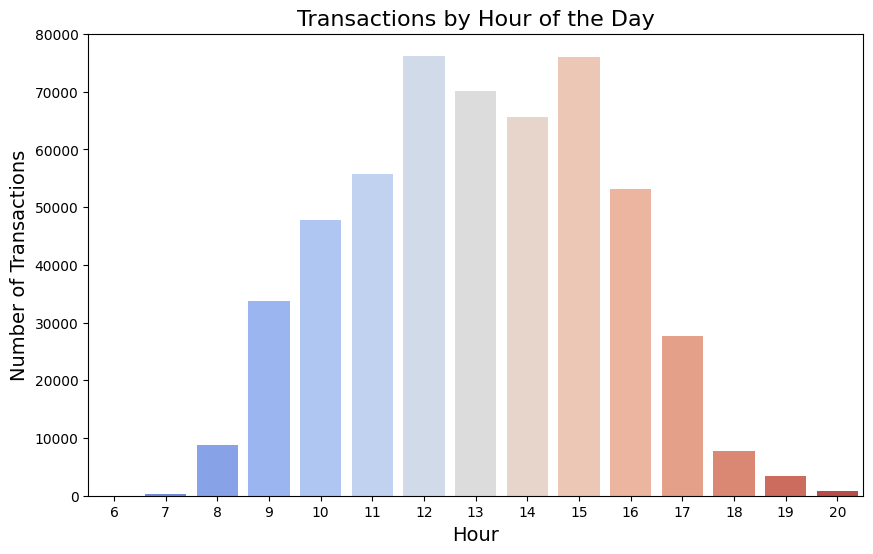

In [97]:
df['Hour'] = df['InvoiceDate'].dt.hour

# Plot transaction frequency by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df, palette='coolwarm')
plt.title('Transactions by Hour of the Day', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.show()

In [99]:
# 1. Average Days Between Purchases (for each customer)
# Sort by 'CustomerID' and 'InvoiceDate' to calculate time difference
df = df.sort_values(by=['CustomerID', 'InvoiceDate'])
df['Prev_InvoiceDate'] = df.groupby('CustomerID')['InvoiceDate'].shift(1)

# Calculate the difference in days between successive purchases
df['Days_Between_Purchases'] = (df['InvoiceDate'] - df['Prev_InvoiceDate']).dt.days

# Calculate the average days between purchases for each customer
df_avg_days = df.groupby('CustomerID')['Days_Between_Purchases'].mean().reset_index()
df_avg_days.columns = ['CustomerID', 'Avg_Days_Between_Purchases']

# Merge back to the main dataframe
df = pd.merge(df, df_avg_days, on='CustomerID', how='left')

# 2. Preferred Shopping Days (day of the week customers shop most)
df['Day_of_Week'] = df['InvoiceDate'].dt.day_name()

# Calculate the preferred shopping day for each customer
df_pref_day = df.groupby('CustomerID')['Day_of_Week'].agg(lambda x: x.value_counts().idxmax()).reset_index()
df_pref_day.columns = ['CustomerID', 'Preferred_Shopping_Day']

# Merge back to the main dataframe
df = pd.merge(df, df_pref_day, on='CustomerID', how='left')

# 3. Peak Shopping Hours (hour of the day when customers shop most)
df['Hour_of_Day'] = df['InvoiceDate'].dt.hour

# Calculate the peak shopping hour for each customer
df_peak_hour = df.groupby('CustomerID')['Hour_of_Day'].agg(lambda x: x.value_counts().idxmax()).reset_index()
df_peak_hour.columns = ['CustomerID', 'Peak_Shopping_Hour']

# Merge back to the main dataframe
df = pd.merge(df, df_peak_hour, on='CustomerID', how='left')

# Show the engineered features
print(df[['CustomerID', 'Avg_Days_Between_Purchases', 'Preferred_Shopping_Day', 'Peak_Shopping_Hour']].head())

  CustomerID  Avg_Days_Between_Purchases Preferred_Shopping_Day  \
0    12346.0                         NaN                Tuesday   
1    12347.0                         2.0                Tuesday   
2    12347.0                         2.0                Tuesday   
3    12347.0                         2.0                Tuesday   
4    12347.0                         2.0                Tuesday   

   Peak_Shopping_Hour  
0                  10  
1                  14  
2                  14  
3                  14  
4                  14  
